err0r


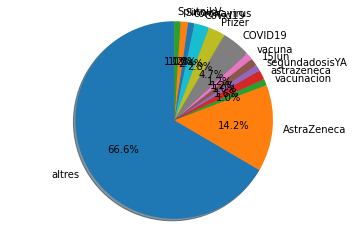

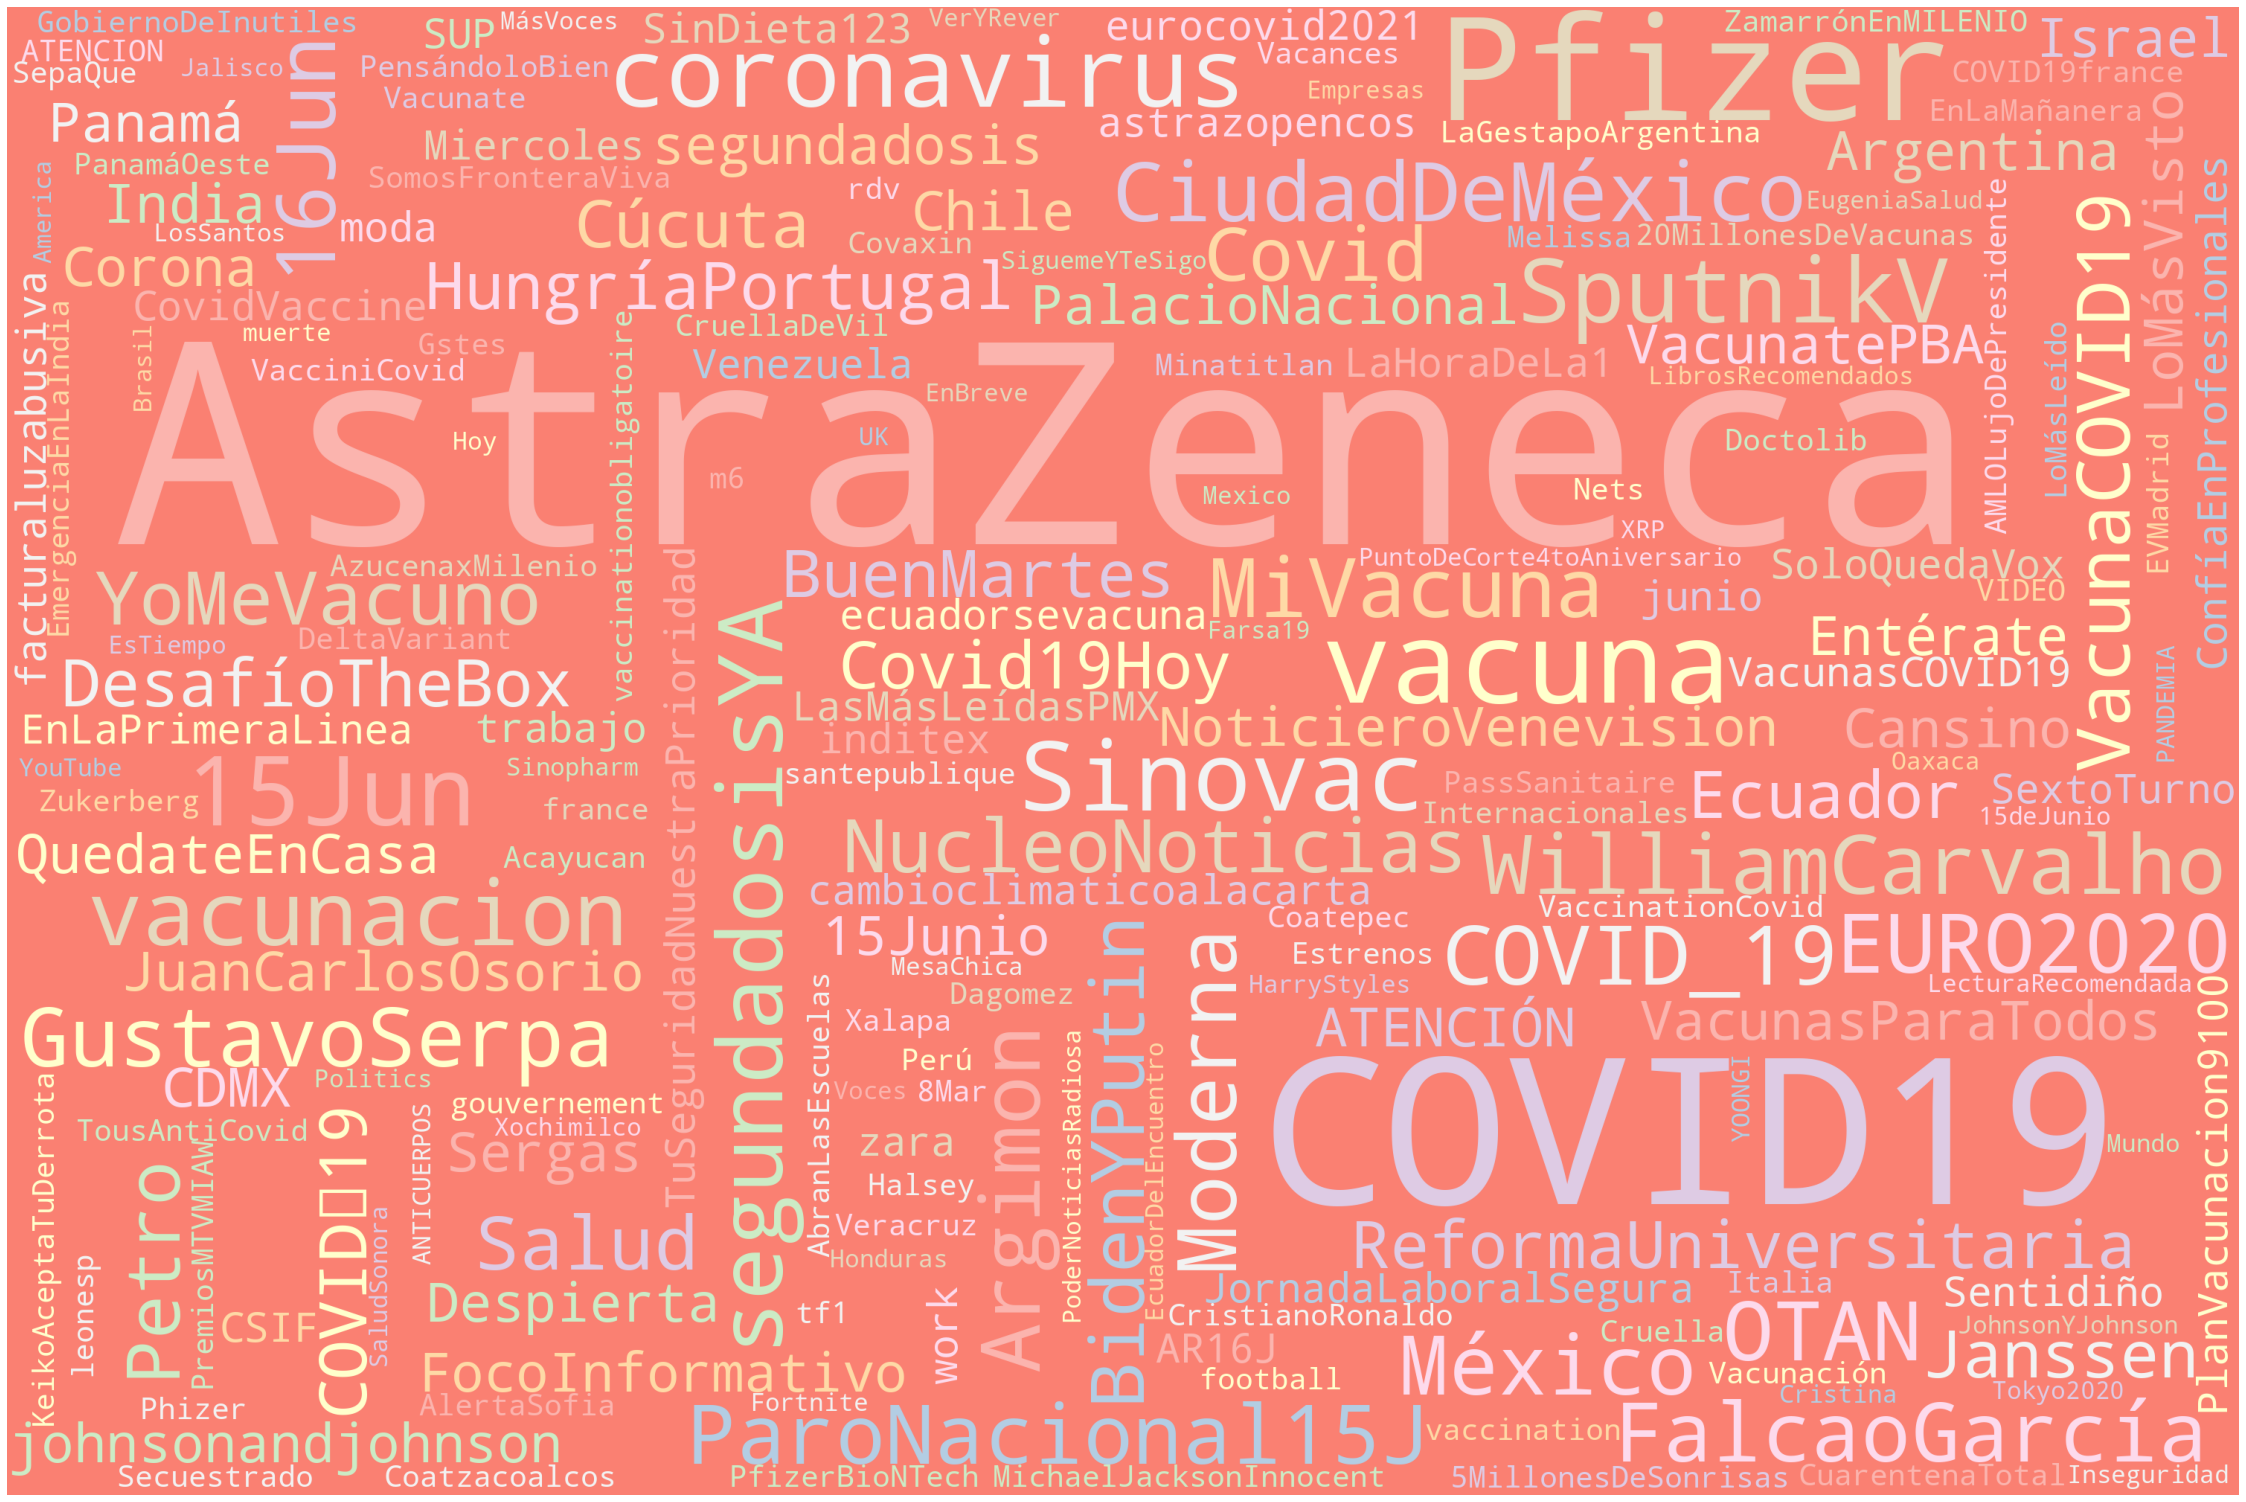

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import lithops
from lithops import Storage
from wordcloud import WordCloud
import csv



config = {'lithops' : {'storage' : 'ibm_cos',    'storage_bucket' : 'XXXX'}
,
          'ibm_cos': {'region': 'XXXX', 'api_key': 'XXXXXX'}}
        


storage = Storage(config=config)  # this will create an ibm_cos Storage instance
numhash=0
hashdict={}

obj=storage.get_object('tweetbucket0135711' , 'astrazeneca.csv')
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    
    
def obtenirStringHashtags(obj):    
    global numhash
    global hashdict
    arguments=' '

    
    a=obj.decode('utf-8')


    csv_reader = csv.reader(a.split('\n'), delimiter=';',quotechar='|', quoting=csv.QUOTE_MINIMAL)

    for lines in csv_reader:
        try:
            result=lines[5]
        except:
            print('err0r')
        result2=result.split(',')
        for i in (result2 ):
           
            if(i!=''):
                arguments=arguments+' '+i
                numhash=numhash+1
                try:
                    hashdict[i] += 1
                except KeyError:
                    hashdict[i] = 1
                    
    return(arguments)

def calcularpercent():
    lista={}
    keys = list(hashdict.keys())
    lista['altres']=0
    for i in keys:
        a=hashdict[i]
        n= (a*100)/numhash
        
        if(n>1):
            lista[i]=n
        else:
            lista['altres']+=n
    
    
    fig1, ax1 = plt.subplots()
    ax1.pie(list(lista.values()), labels=list(lista.keys()), autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

res=obtenirStringHashtags(obj)   
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(res)

#print(hashdict)
calcularpercent()

plot_cloud(wordcloud)


plt.show()

err0r


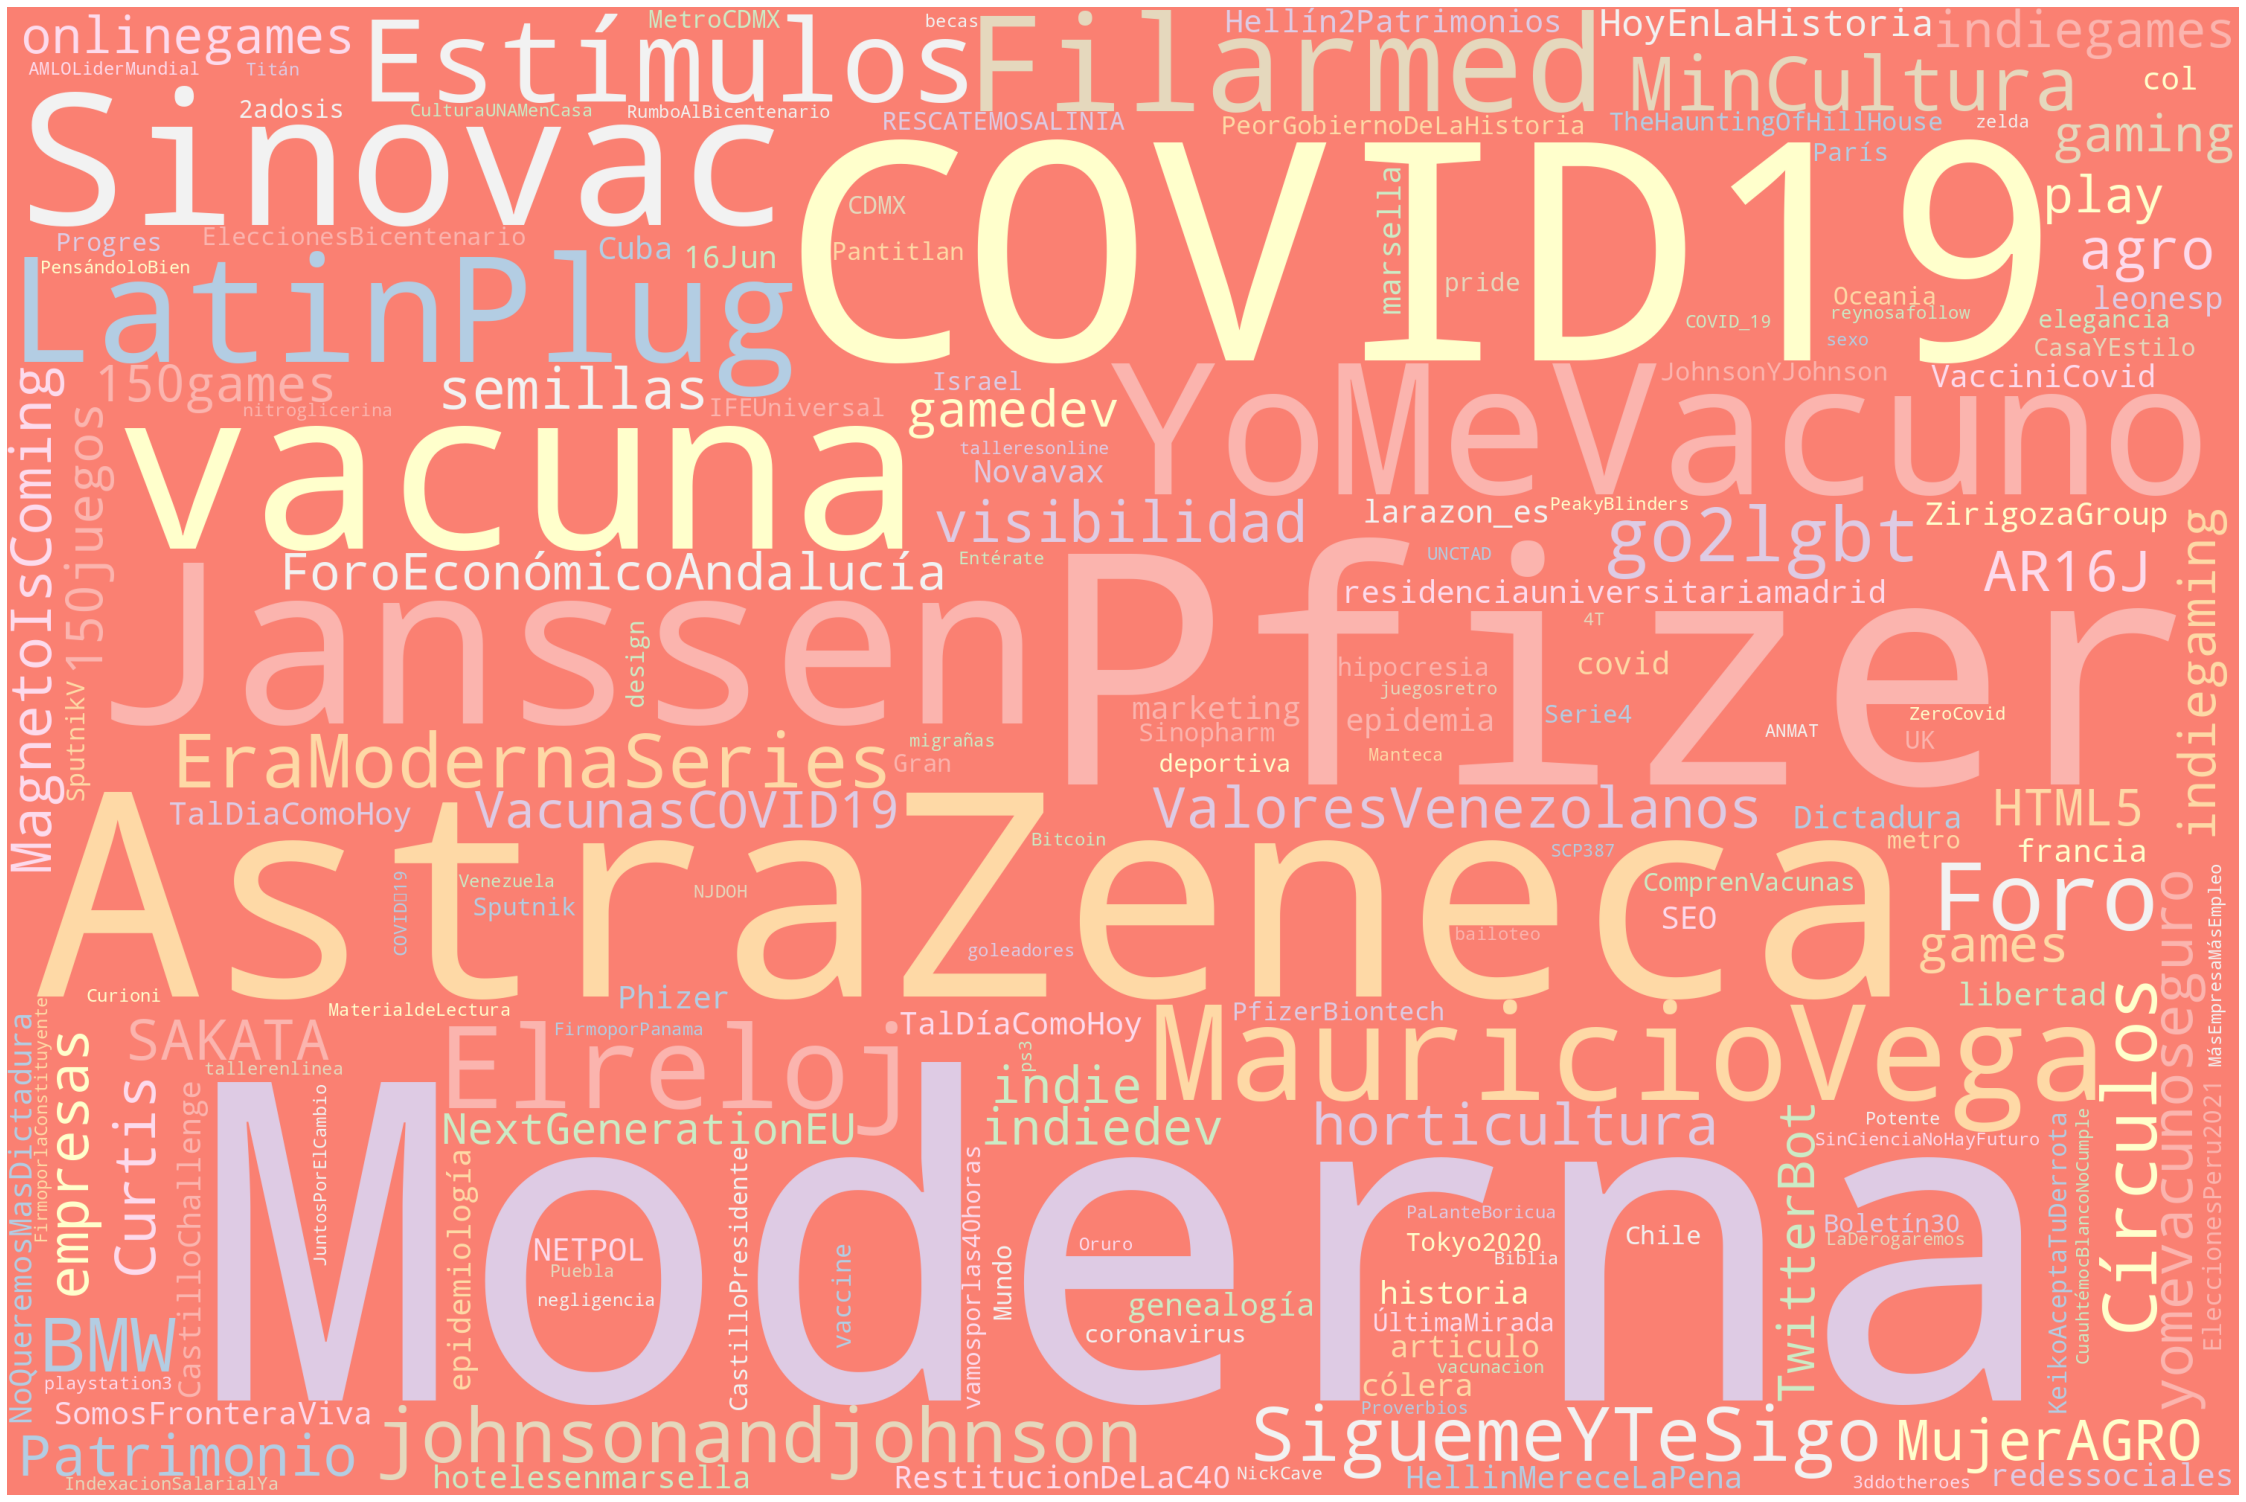

In [10]:
obj2=storage.get_object('tweetbucket0135711' , 'moderna.csv')
res2=obtenirStringHashtags(obj2)   
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(res2)



plot_cloud(wordcloud)



err0r


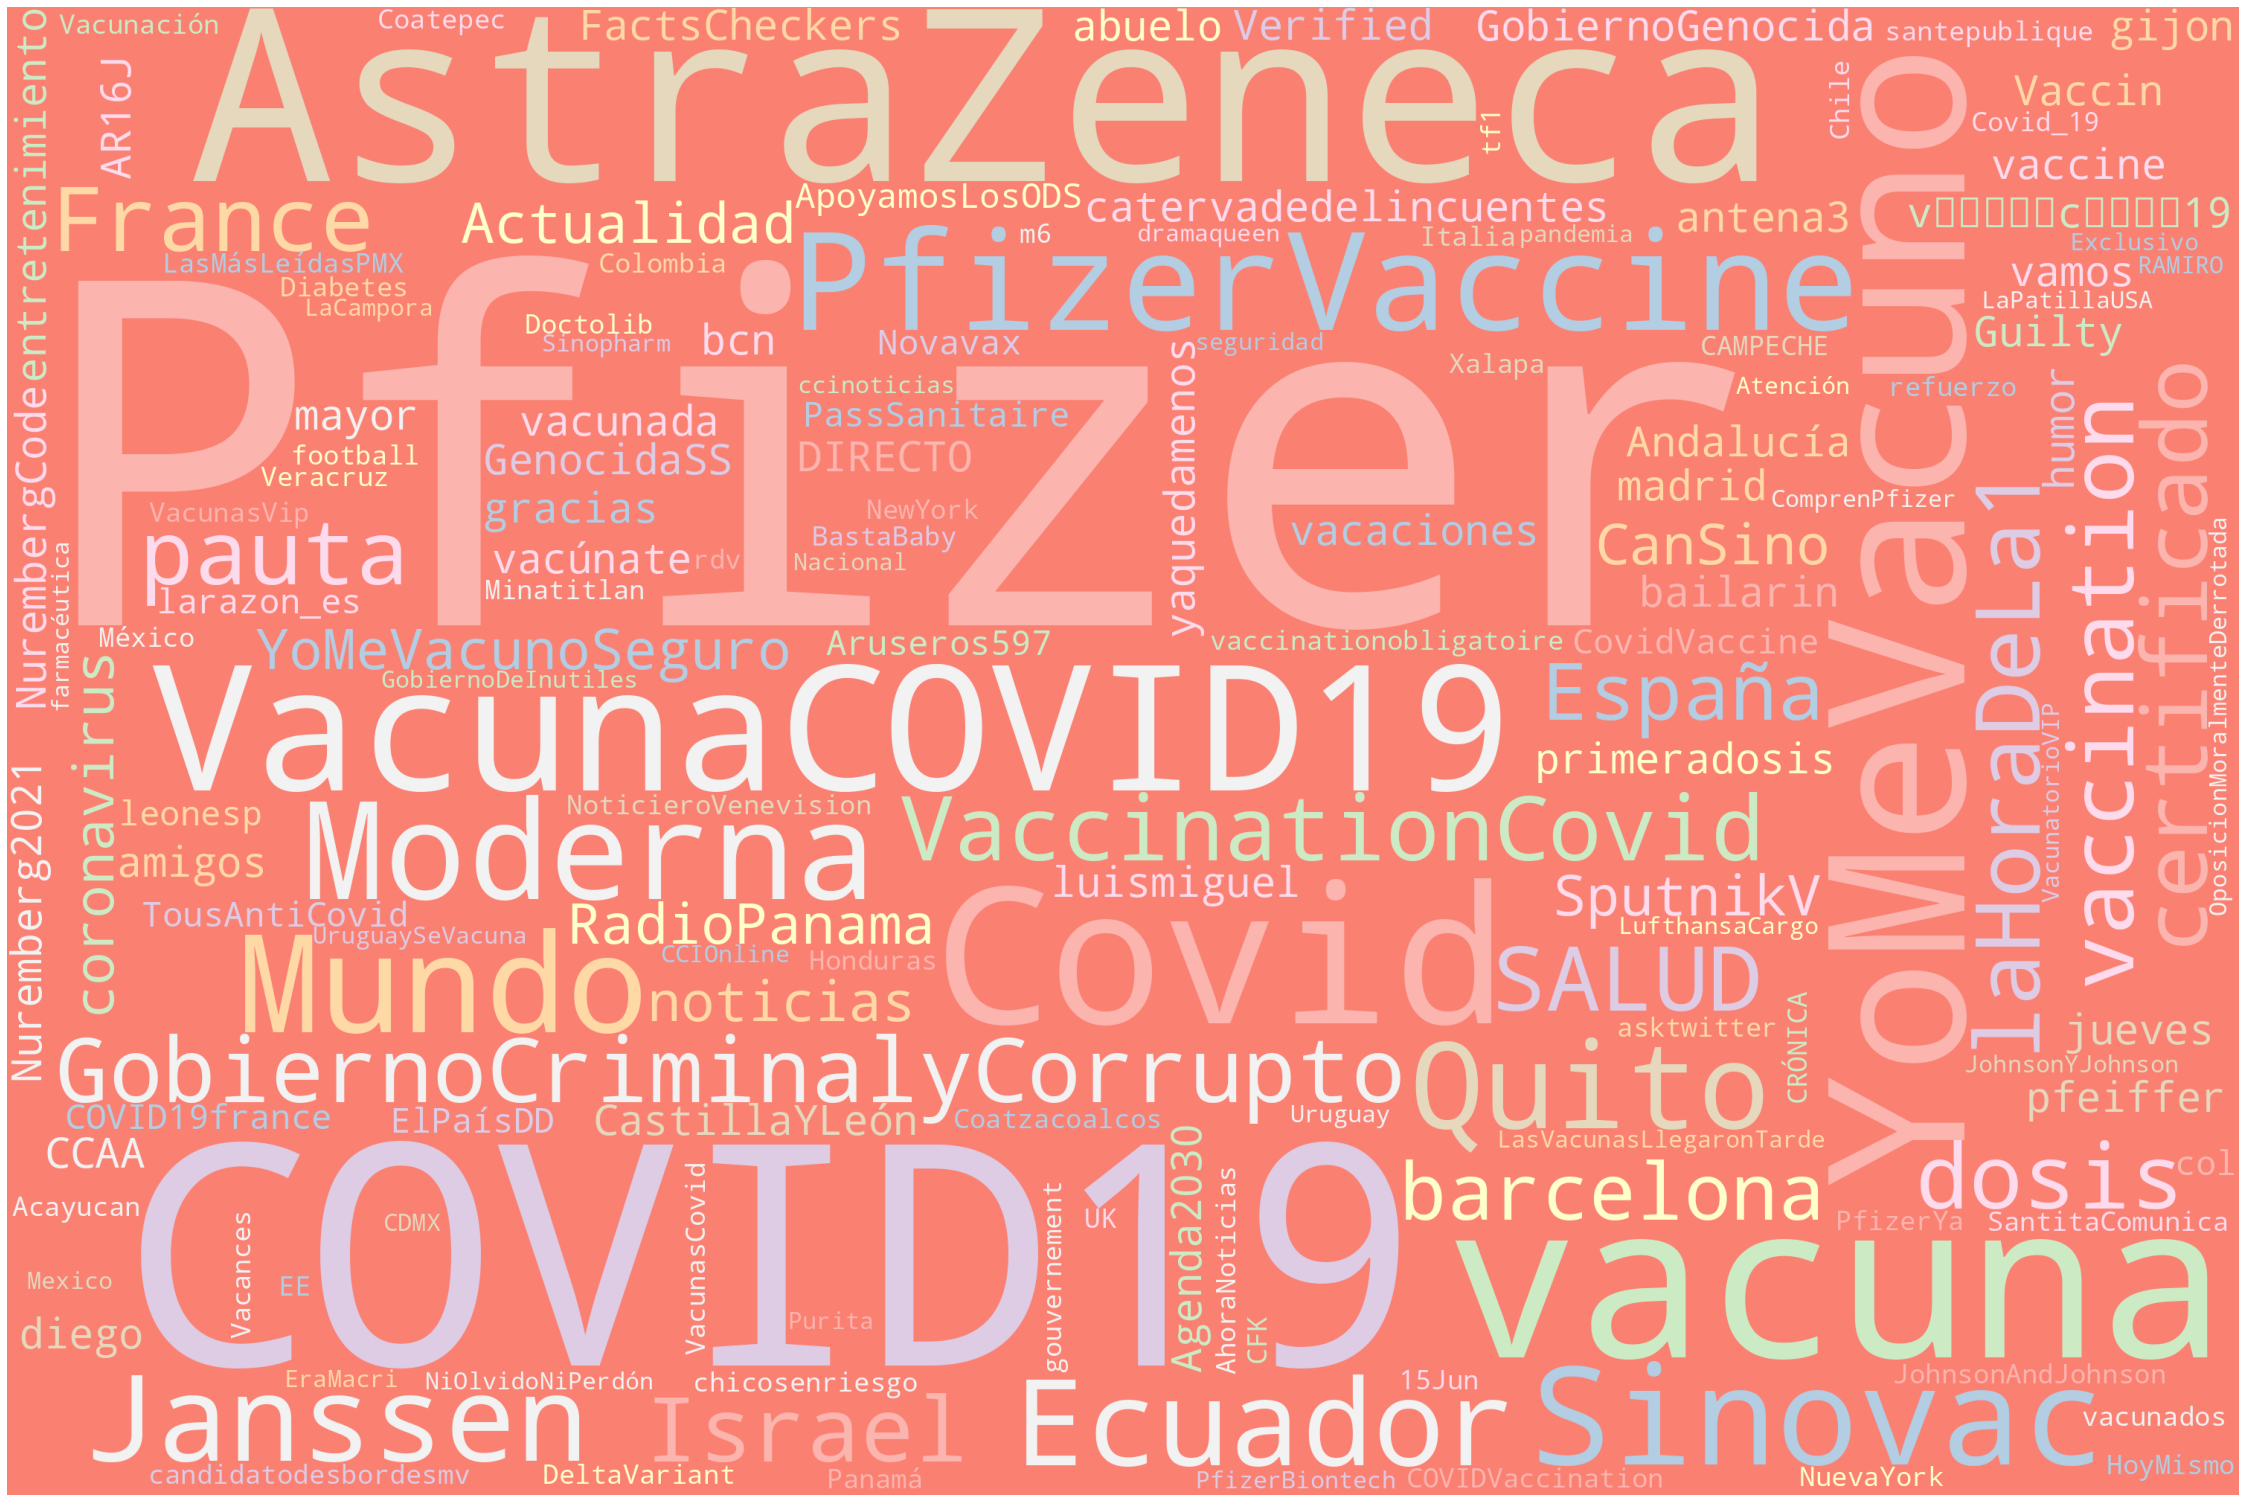

In [77]:
obj3=storage.get_object('tweetbucket0135711' , 'pfizer.csv')
res3=obtenirStringHashtags(obj3)   
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(res3)



plot_cloud(wordcloud)
